# OLA 1 - Data Wrangling and Descriptive Statistics

The following OLA gives yu an opportinmuty to wokr on the first stages of a machine learning / AI project. It is a group project and is intended to give you a chance to practice using typical Numpy/Pandas/Matplotlib and Seaborn functions to prepare and visualize data using simple plots.

## DUE DATE: Week 9 (26 February) hand in on Moodle

### Task 1: Data Exploration and Cleaning

In [268]:
import pandas as pd

df = pd.read_csv("data_science_job.csv")

In [270]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [272]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [274]:
# Lists each column type. Useful for letting us know how we can interpolate the different data.
# Numerical data can be interpolated with df.interpolate().
# Categorical data, object = string, can use the df.mode() to replace missing data with the most used value in the column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [215]:
# Shows count of missing values per column
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64


### Preparing data for plotting. Gender is changed to either 1 or 0 (male/female) as is relevant experience (1 = relevant experience | 0 = no relevant experience)
### String columns with a NaN value is replaced with the most common value in the column

In [221]:
# Interpolates missing values of the type number. It calculates a fitting value within the current values and then adds it to a missing cell
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).interpolate(method='linear')

# Gender is either male or NaN. Assuming NaN = female we can replace the values with 1 for male and 0 for female. The lambda expression does that.
# Same logic ais applied to relevant experience
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['relevent_experience'] = df['relevent_experience'].apply(lambda x: 1 if x == 'Has relevent experience' else 0)

# replaces a missing value with the most common value in the column.
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0], inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
df['major_discipline'].fillna(df['major_discipline'].mode()[0], inplace=True)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,1,1,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,1,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,0,0,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,0,0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,1,1,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,0,1,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,1,1,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,1,1,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,1,1,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,0,1,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


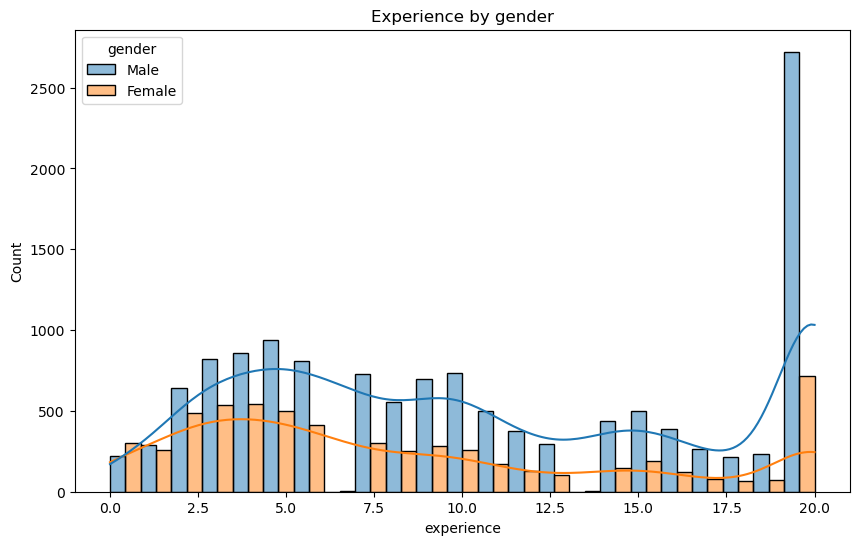

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_mapping = {0: "Female", 1: "Male"}
df["gender"] = df["gender"].map(gender_mapping)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='experience', kde=True, hue='gender', multiple='dodge')
plt.title('Experience by gender')
plt.show()



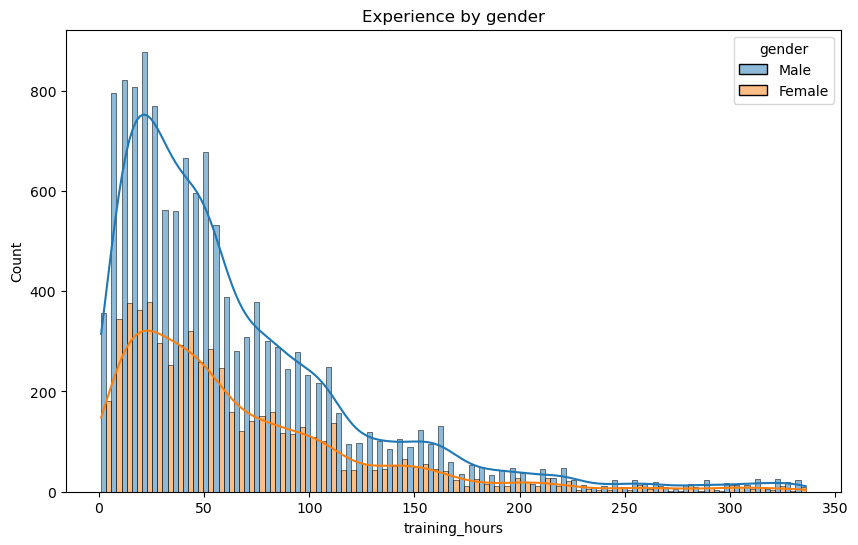

In [227]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='training_hours', kde=True, hue='gender', multiple='dodge')
plt.title('training_hours by gender')
plt.show()

In [ ]:
df.describe()


Statistics for training_hours:
Mean: 65.19
Median: 47.00
Standard Deviation: 59.89

Category Counts for company_type:
company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64


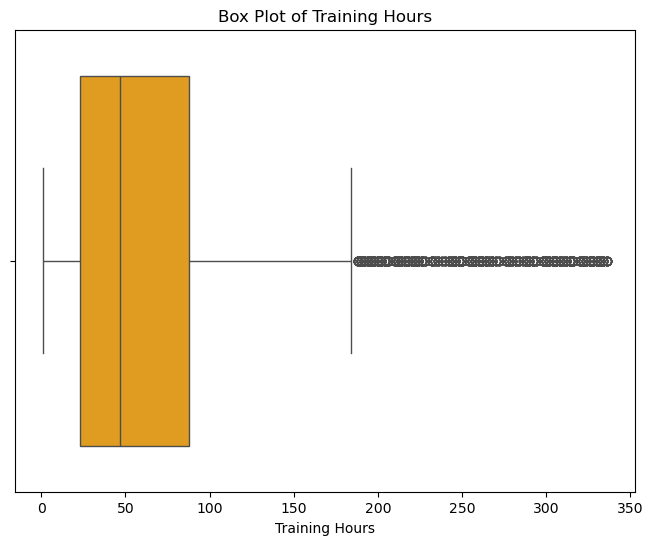

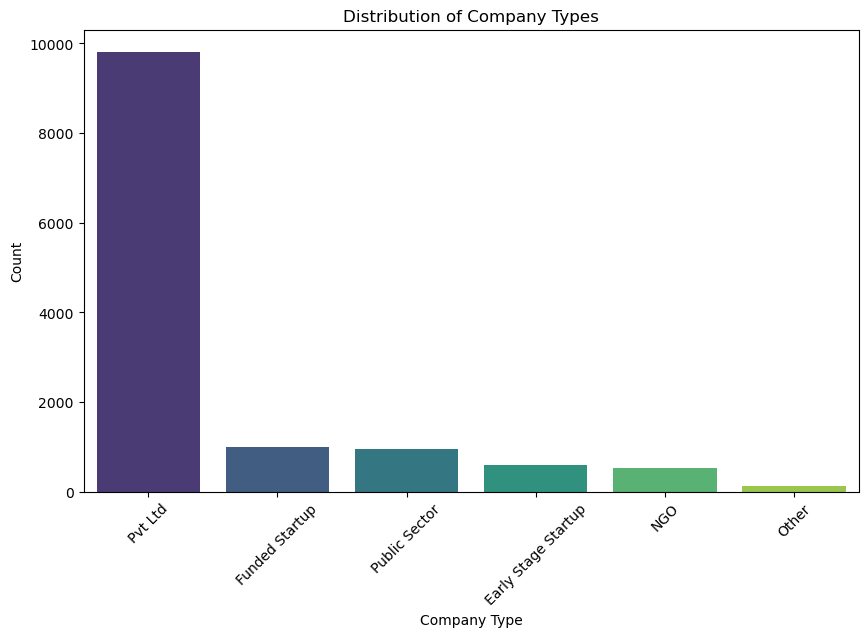

In [164]:
### DESCRIPTIVE STATISTICS ###

# Numerical Features: Mean, Median, Standard Deviation
num_features = ["training_hours"]  # Add more numerical features if needed
for col in num_features:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")

# Categorical Features: Frequency Count
cat_features = ["company_type"]  # Add more categorical features if needed
for col in cat_features:
    print(f"\nCategory Counts for {col}:")
    print(df[col].value_counts())

### VISUALIZATION ###

## BOX PLOT FOR NUMERICAL FEATURES (OUTLIERS) ##
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["training_hours"], color="orange")
plt.title("Box Plot of Training Hours")
plt.xlabel("Training Hours")
plt.show()

# BAR PLOT FOR CATEGORICAL FEATURE: COMPANY TYPE
plt.figure(figsize=(10, 6))

# Get value counts for company type
company_counts = df["company_type"].value_counts()

# Corrected bar plot with explicit hue and legend=False
sns.barplot(x=company_counts.index, y=company_counts.values, hue=company_counts.index, palette="viridis", dodge=False, legend=False)

plt.title("Distribution of Company Types")
plt.xlabel("Company Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

### Task 2: Feature Engineering and Descriptive Statistics

### Task 3: Data Wrangling and Analysis

* A Jupyter notebook containing all the code used.
* A short report (2-3 pages) summarizing the findings and insights from the exercises, including figures and tables as necessary. (This can but does not have to be done in LaTeX! It could be done in Markdown format inside the Jupyter Notebook)
* Submit work to the hand-in folder via the Moodle course - it is a group report but please hand in individually with all group member names and group name easy to find. 